In [65]:
import pandas as pd
import numpy as np

In [66]:
df=pd.read_csv('C:/Users/ASLAM/Desktop/RentPrediction/PuneRentPred1.csv')

In [93]:
df.head()

,index,bedroom,locality,price,area,bathroom
0,0,1,67,6750,450,1
1,1,2,117,18000,916,2
2,2,3,116,16500,1085,3
3,3,1,53,8000,250,1
4,4,2,122,25000,1005,2


In [99]:
df.shape

(20290, 6)

In [100]:
np.isnan(df.any())

index       False
bedroom     False
locality    False
price       False
area        False
bathroom    False
dtype: bool

In [101]:
#np.isfinite(df.all())

In [102]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [103]:
df.drop(columns=['layout_type','seller_type','property_type','furnish_type'],inplace=True)

KeyError: "['layout_type', 'seller_type', 'property_type', 'furnish_type'] not found in axis"

In [104]:
df.drop(columns='Unnamed: 0',inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [105]:
df.shape

(20290, 6)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20290 entries, 0 to 20455
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   index     20290 non-null  int64
 1   bedroom   20290 non-null  int64
 2   locality  20290 non-null  int64
 3   price     20290 non-null  int32
 4   area      20290 non-null  int64
 5   bathroom  20290 non-null  int32
dtypes: int32(2), int64(4)
memory usage: 951.1 KB


In [107]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

0        1
15332    1
15339    1
15338    1
15337    1
        ..
7920     1
7919     1
7917     1
7915     1
22771    1
Name: index, Length: 20290, dtype: int64
********************
2    10165
1     7754
3     2343
4       28
Name: bedroom, dtype: int64
********************
116    2124
41     1406
117    1219
39      938
49      922
       ... 
26       11
47       11
57       10
72       10
6         5
Name: locality, Length: 125, dtype: int64
********************
15000    1226
18000    1141
12000    1073
20000     989
16000     956
         ... 
20900       1
4100        1
17710       1
21690       1
13250       1
Name: price, Length: 355, dtype: int64
********************
1000    969
600     931
650     929
1200    712
1100    599
       ... 
597       1
1386      1
647       1
1094      1
389       1
Name: area, Length: 1033, dtype: int64
********************
2    10730
1     7527
3     1994
4       37
5        1
6        1
Name: bathroom, dtype: int64
********************


In [108]:
values = ['1','2','3','4','5','6']

In [109]:
df = df[df.bathroom.isin(values) == True]


In [110]:
df['bathroom'].value_counts()

Series([], Name: bathroom, dtype: int64)

In [111]:
df['bathroom'] = df['bathroom'].astype(int)

In [112]:
df['price'] = df['price'].astype(str).replace(',', '')

In [113]:
df['price'] = df['price'].apply(lambda x: x.replace(',','')).astype('float')

In [114]:
df.isnull().sum()

index       0.0
bedroom     0.0
locality    0.0
price       0.0
area        0.0
bathroom    0.0
dtype: float64

In [115]:
df[df['price'].isna()]

,index,bedroom,locality,price,area,bathroom


In [116]:
df[~(df['price'] >= 3000)]

,index,bedroom,locality,price,area,bathroom


In [117]:
df.drop(df[df['price'] <= 3000].index, inplace = True)

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_24760\2972211408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['price'] <= 3000].index, inplace = True)


In [118]:
df.shape

(0, 6)

In [119]:
df['price'].unique()

array([], dtype=float64)

In [120]:
df['locality'].unique()

array([], dtype=int64)

In [121]:
df.describe()

,index,bedroom,locality,price,area,bathroom
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df['area'].unique()

array([], dtype=int64)

In [91]:
df['price'] = df['price'].astype(int)

In [92]:
df['locality']=df['locality'].apply(lambda x:x.strip())
location_count=df['locality'].value_counts()

In [93]:
location_less10=location_count[location_count<=10]
location_less10

Pimpri Chinchwad             10
Mukund Nagar                 10
Daund                        10
Law College Road              9
Bharati Vidyapeeth Campus     9
                             ..
Marvel Fria Road              1
Tapodham                      1
Sindhi Colony                 1
Kalwad                        1
Aundh Gaon                    1
Name: locality, Length: 327, dtype: int64

Pimpri Chinchwad             10
Mukund Nagar                 10
Daund                        10
Law College Road              9
Bharati Vidyapeeth Campus     9
                             ..
Marvel Fria Road              1
Tapodham                      1
Sindhi Colony                 1
Kalwad                        1
Aundh Gaon                    1
Name: locality, Length: 327, dtype: int64

In [94]:
df['locality']=df['locality'].apply(lambda x:'other' if x in location_less10 else x)

In [95]:
 df.drop(df[df['price'] < 3000].index,inplace=True)

C:\Users\ASLAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

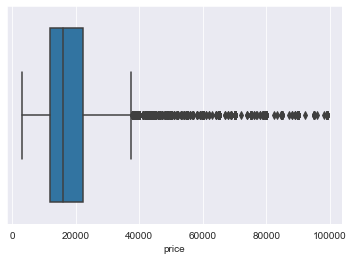

C:\Users\ASLAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

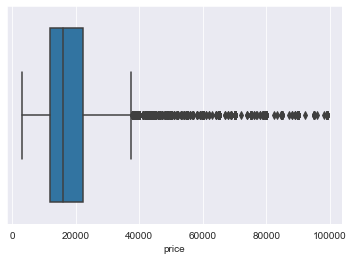

In [96]:
import seaborn as sns
sns.boxplot(df['price'])

In [97]:
df['price'].value_counts()

15000    1236
18000    1147
12000    1074
20000     997
16000     962
         ... 
14400       1
19650       1
83200       1
82500       1
13250       1
Name: price, Length: 444, dtype: int64

15000    1236
18000    1147
12000    1074
20000     997
16000     962
         ... 
14400       1
19650       1
83200       1
82500       1
13250       1
Name: price, Length: 444, dtype: int64

In [98]:
df.drop(df[df['price'] >= 35000].index, inplace = True)

In [99]:
df.shape

(20462, 5)

(20462, 5)

C:\Users\ASLAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

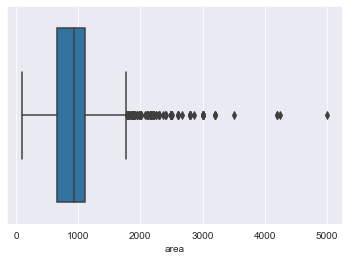

C:\Users\ASLAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

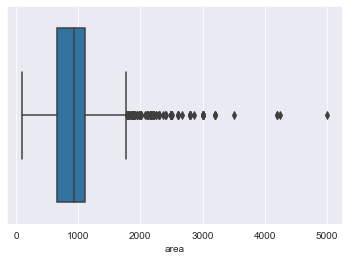

In [100]:
sns.boxplot(df['area'])

In [101]:
df['area'].value_counts()

1000    969
600     931
650     929
1200    712
1100    599
       ... 
843       1
808       1
552       1
437       1
389       1
Name: area, Length: 1070, dtype: int64

1000    969
600     931
650     929
1200    712
1100    599
       ... 
843       1
808       1
552       1
437       1
389       1
Name: area, Length: 1070, dtype: int64

In [66]:
df.drop(df[df['area'] >= 2000].index, inplace = True)

In [67]:
df.shape

(20290, 6)

In [68]:
df.head()

,index,bedroom,locality,price,area,bathroom
0,0,1,67,6750,450,1
1,1,2,117,18000,916,2
2,2,3,116,16500,1085,3
3,3,1,53,8000,250,1
4,4,2,122,25000,1005,2


In [69]:
X=df.drop(columns=['price'])
y=df['price']

In [70]:
X

,index,bedroom,locality,area,bathroom
0,0,1,67,450,1
1,1,2,117,916,2
2,2,3,116,1085,3
3,3,1,53,250,1
4,4,2,122,1005,2
...,...,...,...,...,...
20451,22767,1,24,650,1
20452,22768,1,115,350,1
20453,22769,1,53,389,1
20454,22770,1,117,670,2


In [71]:
y

0         6750
1        18000
2        16500
3         8000
4        25000
         ...  
20451    13250
20452     7000
20453     8500
20454    16500
20455    12000
Name: price, Length: 20290, dtype: int32

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
X_train.shape

(16232, 5)

In [75]:
X_test.shape

(4058, 5)

In [76]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [77]:
ohe=OneHotEncoder(handle_unknown='ignore')

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler=StandardScaler()

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['locality']=le.fit_transform(df['locality'])

In [81]:
lr=LinearRegression()

In [82]:
ohe.fit(X[['locality']])

OneHotEncoder(handle_unknown='ignore')

In [83]:
ct=make_column_transformer((OneHotEncoder(sparse=False),['locality']),remainder='passthrough')

In [84]:
pipe=make_pipeline(ct,scaler,lr)

In [85]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['locality'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [86]:
df.drop(df[df['locality']=='Boat Club Road'].index, inplace = True)

In [87]:
y_pred_lr=pipe.predict(X_test)

In [88]:
print(r2_score(y_test,y_pred_lr)*100)

70.40766681737168


In [89]:
import pickle

In [90]:
pickle.dump(pipe,open('Model.pkl','wb'))

In [91]:
df1=pd.read_csv('pune_file.csv')

In [128]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()